In [6]:
import datetime as dt
import backtrader as bt
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [7]:
class testSTG(bt.Strategy):
    def __init__(self):
        pass

    def next(self):
        pass

In [8]:
tickers_list = ['AAPL']

df_tic = pd.read_hdf("datasets/df_SnP_500_ohlcv.h5", "df", mode = 'r')
df_tic = df_tic[df_tic['tic'].isin(tickers_list)]

df_tic = df_tic.set_index('date')
print(df_tic.head(5))

             tic       open       high        low      close  adj_close  \
date                                                                      
2018-01-02  AAPL  42.540001  43.075001  42.314999  43.064999  40.776531   
2018-01-03  AAPL  43.132500  43.637501  42.990002  43.057499  40.769417   
2018-01-04  AAPL  43.134998  43.367500  43.020000  43.257500  40.958786   
2018-01-05  AAPL  43.360001  43.842499  43.262501  43.750000  41.425125   
2018-01-08  AAPL  43.587502  43.902500  43.482498  43.587502  41.271259   

               volume  
date                   
2018-01-02  102223600  
2018-01-03  118071600  
2018-01-04   89738400  
2018-01-05   94640000  
2018-01-08   82271200  


Starting Portfolio Value: 100000.00
Ending Portfolio Value: 100000.00


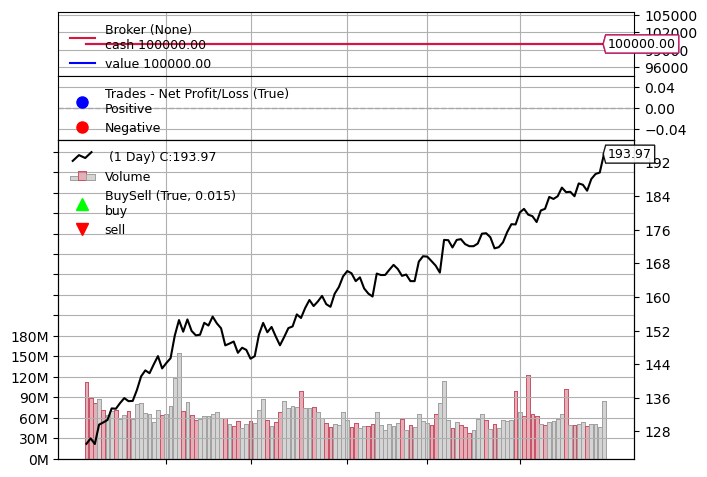

[[<Figure size 640x480 with 4 Axes>]]

In [9]:
data = bt.feeds.PandasData(dataname = df_tic,
                                        datetime=None, 
                                        open =1,
                                        high=2,
                                        low=3,
                                        close=4,
                                        volume=6,
                                        openinterest=-1,
                                        timeframe = bt.TimeFrame.Days,
                                        fromdate=dt.datetime(2023, 1, 1),  # Specify the start date
                                        todate=dt.datetime(2023, 6, 30),   # Specify the end date
                                    )

cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(testSTG)

cerebro.broker.set_cash(100000)  # Set your initial cash amount
cerebro.broker.setcommission(commission=0.001)  # Set commission value

print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())
cerebro.run()
print("Ending Portfolio Value: %.2f" % cerebro.broker.getvalue())

#Resample Data
# cerebro = bt.Cerebro()

# cerebro.run()

cerebro.plot(iplot=False)

## Strategy

![Screenshot 2023-08-27 093211.png](<attachment:Screenshot 2023-08-27 093211.png>)
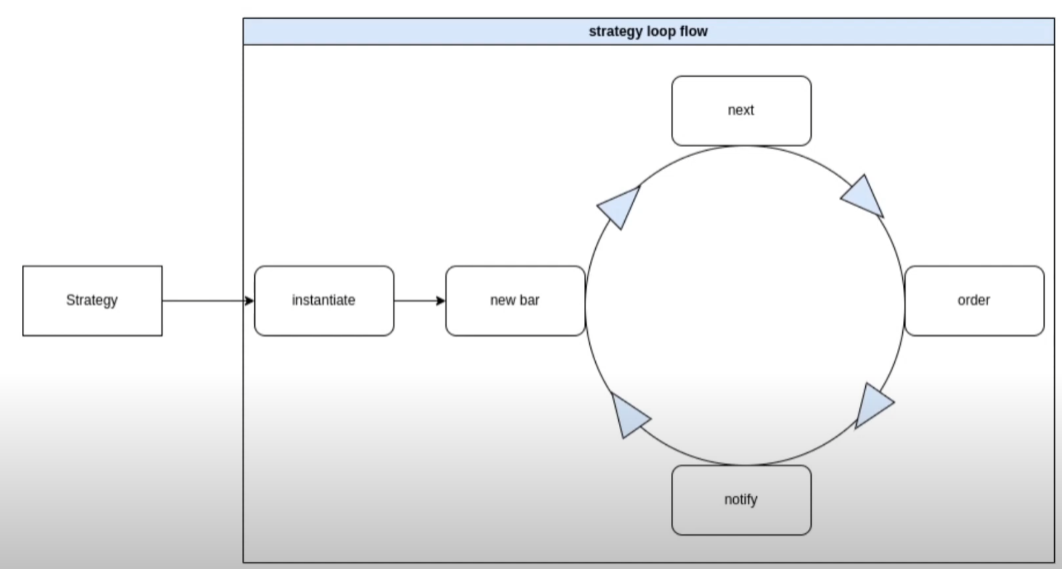

![Screenshot 2023-08-27 093141.png](<attachment:Screenshot 2023-08-27 093141.png>)
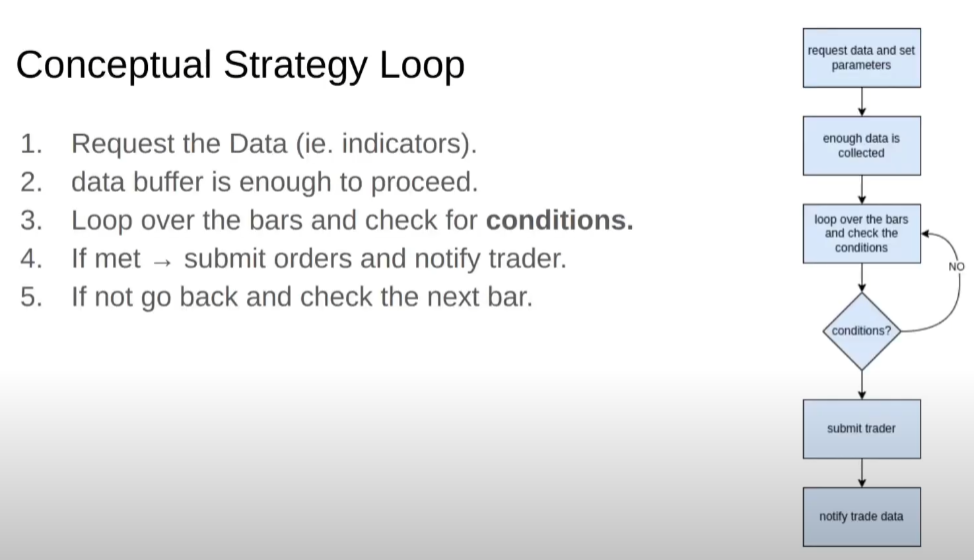

![Screenshot 2023-08-27 093749.png](<attachment:Screenshot 2023-08-27 093749.png>)
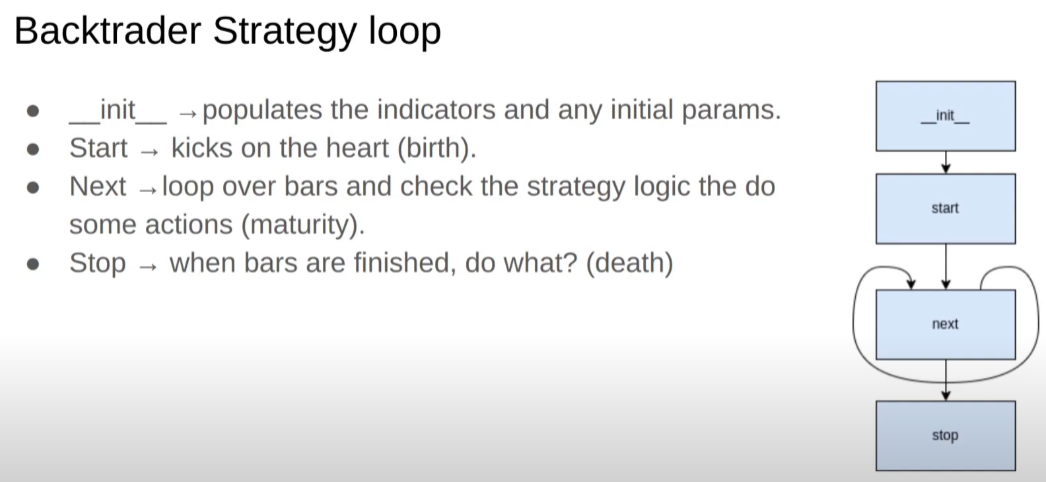

![Screenshot 2023-08-27 093917.png](<attachment:Screenshot 2023-08-27 093917.png>)
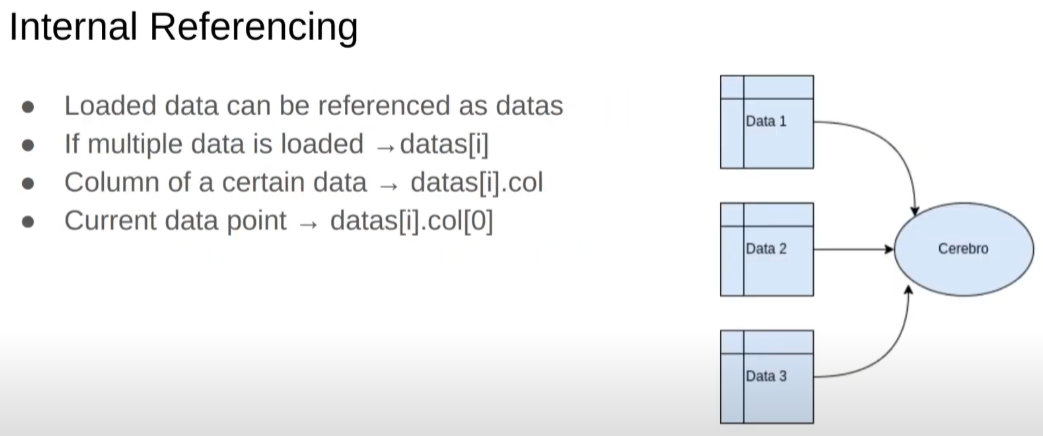

In [10]:
tickers_list = ['TSLA']

df_tics = pd.read_hdf("datasets/df_SnP_500_ohlcv.h5", "df", mode = 'r')
tsla = df_tics[df_tics['tic'].isin(tickers_list)]
tsla = tsla.set_index('date')

In [11]:
tsla.info

<bound method DataFrame.info of              tic        open        high         low       close   adj_close  \
date                                                                           
2018-01-02  TSLA   20.799999   21.474001   20.733334   21.368668   21.368668   
2018-01-03  TSLA   21.400000   21.683332   21.036667   21.150000   21.150000   
2018-01-04  TSLA   20.858000   21.236668   20.378668   20.974667   20.974667   
2018-01-05  TSLA   21.108000   21.149332   20.799999   21.105333   21.105333   
2018-01-08  TSLA   21.066668   22.468000   21.033333   22.427334   22.427334   
...          ...         ...         ...         ...         ...         ...   
2023-08-24  TSLA  238.660004  238.919998  228.179993  230.039993  230.039993   
2023-08-25  TSLA  231.309998  239.000000  230.350006  238.589996  238.589996   
2023-08-28  TSLA  242.580002  244.380005  235.350006  238.820007  238.820007   
2023-08-29  TSLA  238.580002  257.480011  237.770004  257.179993  257.179993   
2023-08-

In [12]:
data = bt.feeds.PandasData(dataname = tsla,
                            datetime = None,
                            open =1,
                            high=2,
                            low=3,
                            close=4,
                            volume=6,
                            openinterest=-1)

In [13]:
class testSTG(bt.Strategy):
    def __init__(self):
        pass

    def next(self):
        pass

class testClose(bt.Strategy):
    def __init__(self):
        pass
    
    def next(self):
        dataclose = self.datas[0].close[0]
        print(dataclose)

class testClosei(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
    def next(self):
        print(self.dataclose[0])

class testlog(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close

    def log(self,text):
        dt = self.datas[0].datetime.datetime()
        print(f'{dt} | {text}')

    def next(self):
        x = self.dataclose[0]
        self.log(text = x)

In [14]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(testlog)

0

In [15]:
cerebro.run()

2018-01-02 00:00:00 | 21.368667602539062
2018-01-03 00:00:00 | 21.149999618530273
2018-01-04 00:00:00 | 20.974666595458984
2018-01-05 00:00:00 | 21.10533332824707
2018-01-08 00:00:00 | 22.42733383178711
2018-01-09 00:00:00 | 22.246000289916992
2018-01-10 00:00:00 | 22.31999969482422
2018-01-11 00:00:00 | 22.530000686645508
2018-01-12 00:00:00 | 22.4146671295166
2018-01-16 00:00:00 | 22.67066764831543
2018-01-17 00:00:00 | 23.143999099731445
2018-01-18 00:00:00 | 22.971332550048828
2018-01-19 00:00:00 | 23.334667205810547
2018-01-22 00:00:00 | 23.437332153320312
2018-01-23 00:00:00 | 23.519332885742188
2018-01-24 00:00:00 | 23.05933380126953
2018-01-25 00:00:00 | 22.50933265686035
2018-01-26 00:00:00 | 22.856666564941406
2018-01-29 00:00:00 | 23.302000045776367
2018-01-30 00:00:00 | 23.05466651916504
2018-01-31 00:00:00 | 23.62066650390625
2018-02-01 00:00:00 | 23.28333282470703
2018-02-02 00:00:00 | 22.916667938232422
2018-02-05 00:00:00 | 22.208667755126953
2018-02-06 00:00:00 | 22.26

![Screenshot 2023-08-27 102544.png](<attachment:Screenshot 2023-08-27 102544.png>)
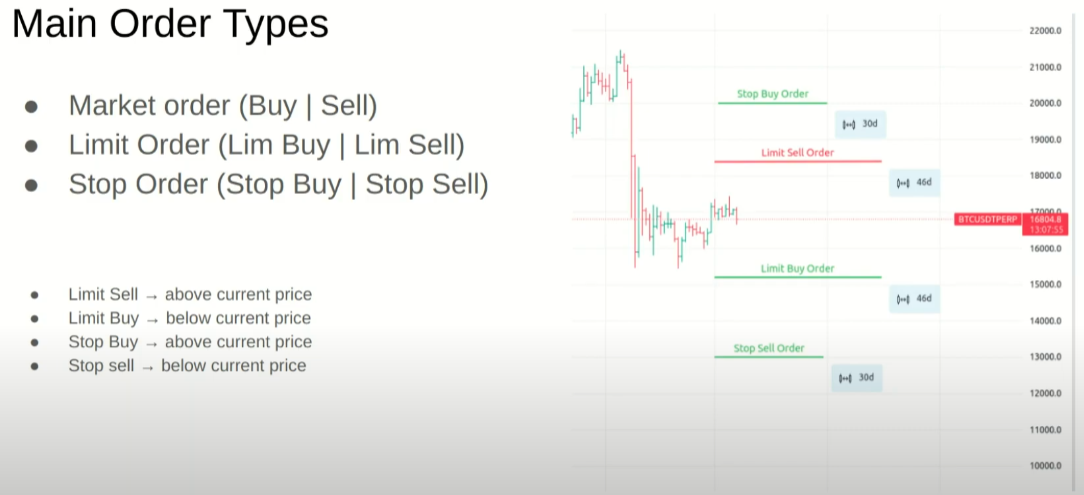

![Screenshot 2023-08-27 102739.png](<attachment:Screenshot 2023-08-27 102739.png>)
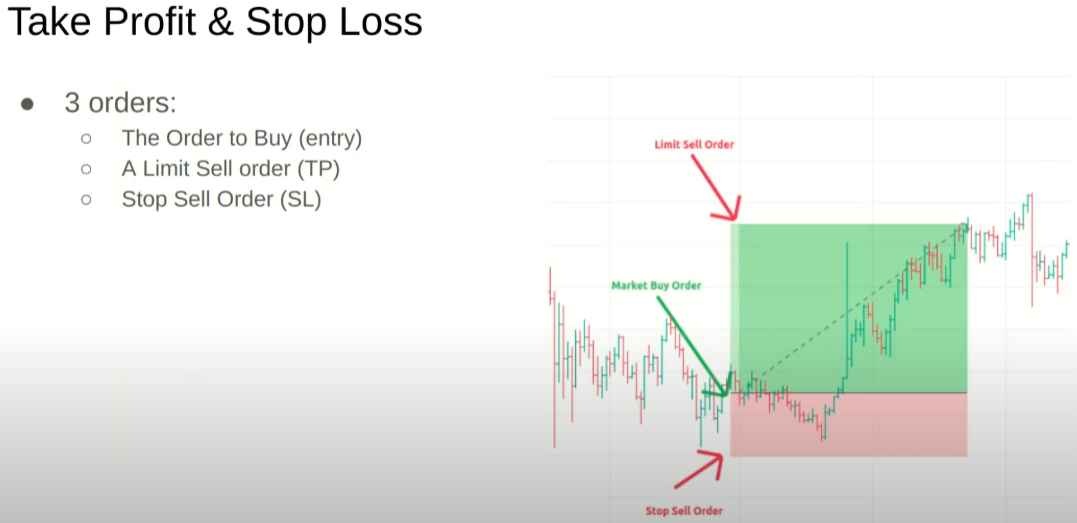

![Screenshot 2023-08-27 102901.png](<attachment:Screenshot 2023-08-27 102901.png>)
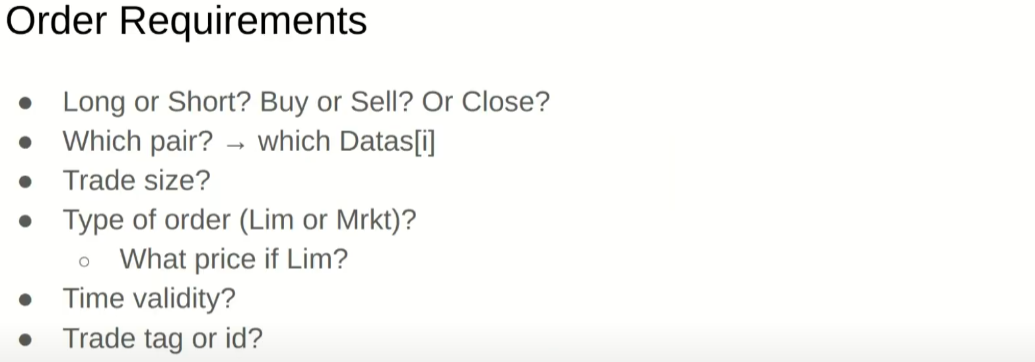

![Screenshot 2023-08-27 103113.png](<attachment:Screenshot 2023-08-27 103113.png>)
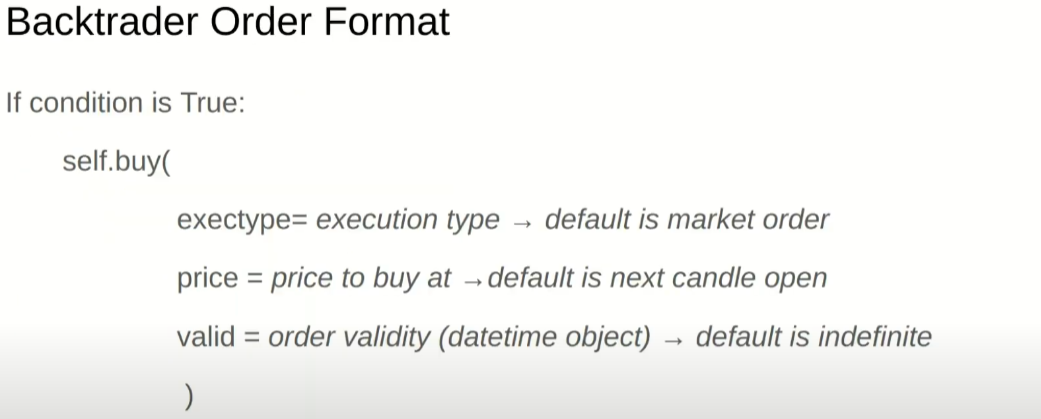

## Basic Momentum Strategy

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
import backtrader as bt
import datetime

### momentum
if close[2] > close[1]   --> buy
if the close[2]> close[2]  --> sell

In [17]:
class Momentum(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close

    def log(self,text):
        dt = self.datas[0].datetime.datetime()
        print(f'{dt} | {text}')

    def next(self):
        x = self.dataclose[0]
        self.log(text = x)
        if self.dataclose[-2] > self.dataclose[-1]:
            self.order = self.buy()
            print(f'buy executed @ {self.dataclose[0]}')
        if self.dataclose[-2] < self.dataclose[-1]:
            self.order = self.sell()
            print(f'sell executed @ {self.dataclose[0]}')
        else:
            self.order = self.close()

In [18]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(Momentum)

0

In [19]:
cerebro.run()

2018-01-02 00:00:00 | 21.368667602539062
buy executed @ 21.368667602539062
2018-01-03 00:00:00 | 21.149999618530273
buy executed @ 21.149999618530273
2018-01-04 00:00:00 | 20.974666595458984
buy executed @ 20.974666595458984
2018-01-05 00:00:00 | 21.10533332824707
buy executed @ 21.10533332824707
2018-01-08 00:00:00 | 22.42733383178711
sell executed @ 22.42733383178711
2018-01-09 00:00:00 | 22.246000289916992
sell executed @ 22.246000289916992
2018-01-10 00:00:00 | 22.31999969482422
buy executed @ 22.31999969482422
2018-01-11 00:00:00 | 22.530000686645508
sell executed @ 22.530000686645508
2018-01-12 00:00:00 | 22.4146671295166
sell executed @ 22.4146671295166
2018-01-16 00:00:00 | 22.67066764831543
buy executed @ 22.67066764831543
2018-01-17 00:00:00 | 23.143999099731445
sell executed @ 23.143999099731445
2018-01-18 00:00:00 | 22.971332550048828
sell executed @ 22.971332550048828
2018-01-19 00:00:00 | 23.334667205810547
buy executed @ 23.334667205810547
2018-01-22 00:00:00 | 23.437332

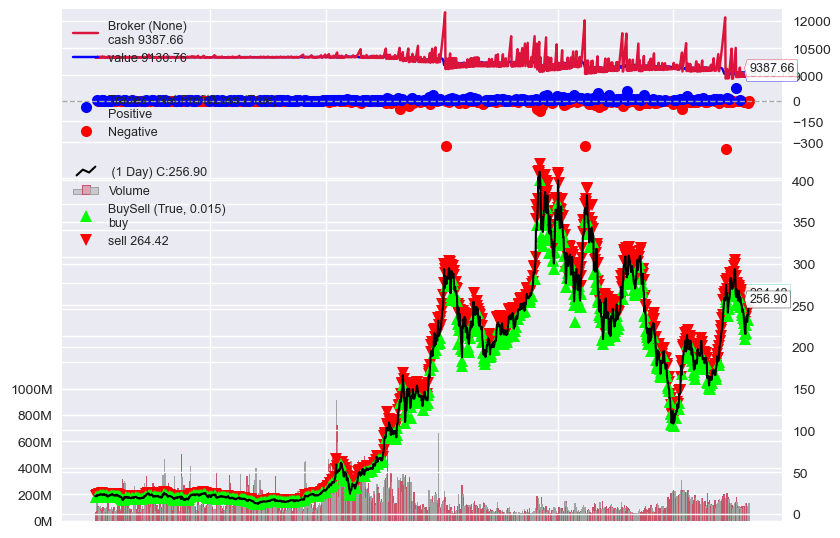

[[<Figure size 800x550 with 4 Axes>]]

In [20]:
%matplotlib inline
cerebro.plot(iplot=False)

In [21]:
# pd = pd.read_csv('eur_hourly.csv',parse_dates = True,index_col = 'Timestamp')
# df['return'] = np.log(df.price /df.price.shift(1))
# df['return'].groupby(df.index.hour).mean().plot(kind=bar) 

# ## Hourly bias strategy can be designed

![Screenshot 2023-08-27 104803.png](<attachment:Screenshot 2023-08-27 104803.png>)
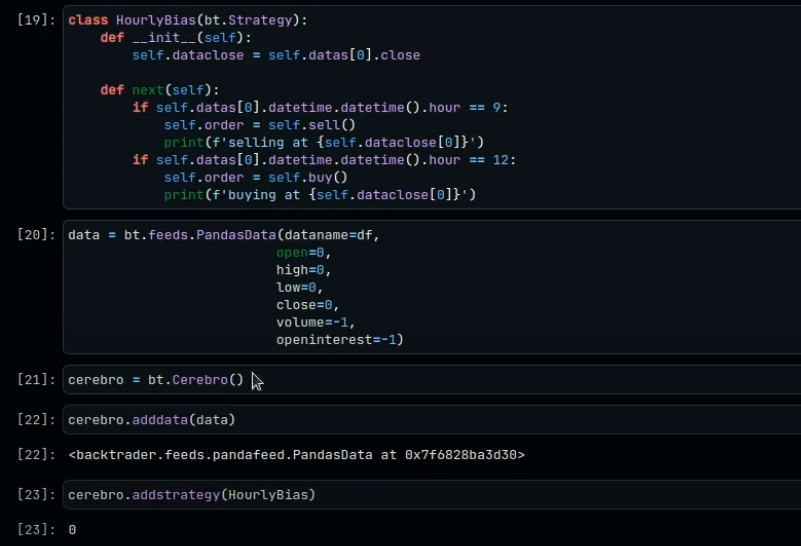

## Backtrader Indicator

![Screenshot 2023-08-27 105050.png](<attachment:Screenshot 2023-08-27 105050.png>)
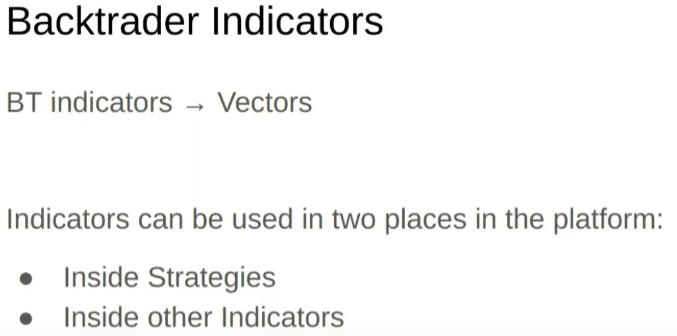

![Screenshot 2023-08-27 105138.png](<attachment:Screenshot 2023-08-27 105138.png>)
![Screenshot 2023-08-27 105616.png](<attachment:Screenshot 2023-08-27 105616.png>)
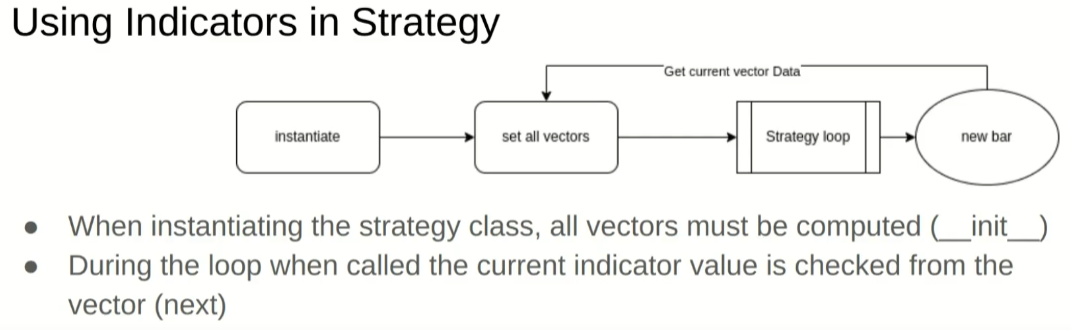
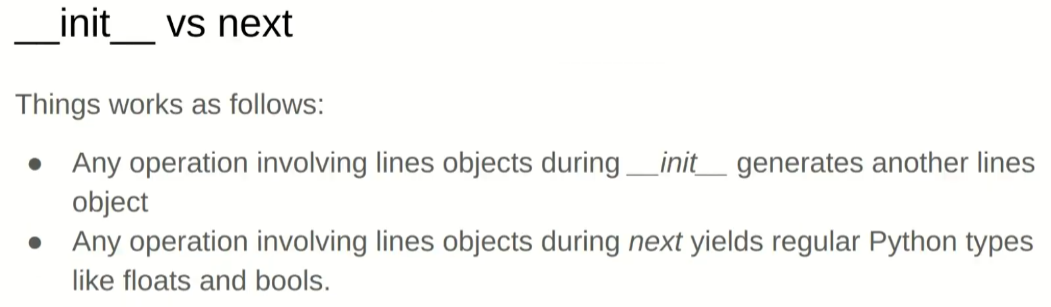

![Screenshot 2023-08-27 105754.png](<attachment:Screenshot 2023-08-27 105754.png>)
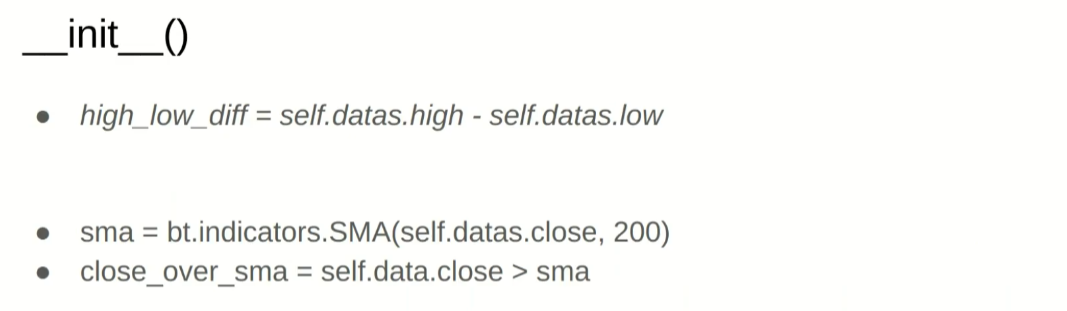

![Screenshot 2023-08-27 110517.png](<attachment:Screenshot 2023-08-27 110517.png>)
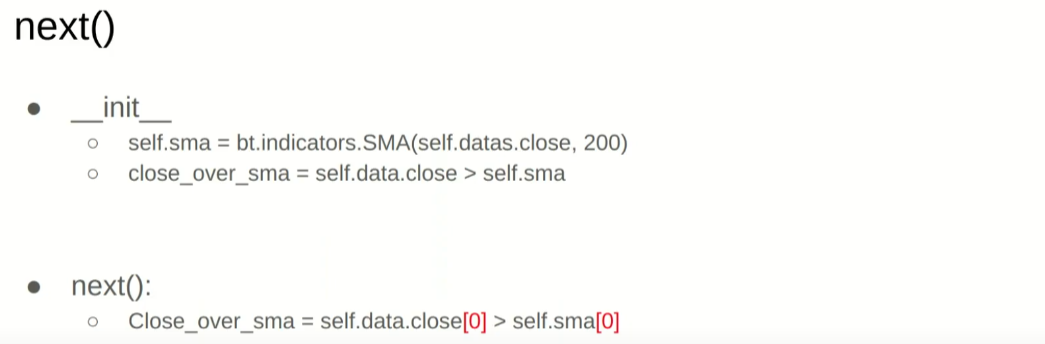

In [22]:
class TestStg(bt.Strategy):
    def __init__(self):
        self.sma = bt.indicators.SMA(self.datas[0].close, period = 200)
        self.rsi = bt.indicators.RSI(self.datas[0].close,period=14)

    def next(self):
        print(f'current price {self.datas[0].close[0]} | SMA {self.sma[0]} | RSI {self.rsi[0]}')

In [23]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(TestStg)

0

In [24]:
cerebro.run()

current price 18.439332962036133 | SMA 20.861733293533327 | RSI 48.14516029901988
current price 18.118667602539062 | SMA 20.845483293533324 | RSI 46.484503250769514
current price 17.5939998626709 | SMA 20.827703294754027 | RSI 43.821153975734035
current price 17.333332061767578 | SMA 20.80949662208557 | RSI 42.51775328398984
current price 17.39666748046875 | SMA 20.79095329284668 | RSI 42.96167342914842
current price 19.609333038330078 | SMA 20.776863288879394 | RSI 55.803179470022194
current price 19.233333587646484 | SMA 20.76179995536804 | RSI 53.59502338838511
current price 20.99066734313965 | SMA 20.75515329360962 | RSI 61.302399973237414
current price 22.059999465942383 | SMA 20.752803287506104 | RSI 65.1007987215163
current price 22.323333740234375 | SMA 20.752346620559692 | RSI 65.98622183766486
current price 21.99333381652832 | SMA 20.748959951400757 | RSI 63.80168850682923
current price 22.488000869750977 | SMA 20.745679960250854 | RSI 65.63808558846625
current price 22.95199

### Check Portfolio Value before and after Strategy

In [6]:
import backtrader as bt
cerebro = bt.Cerebro()

# Default starting portfolio value is 10000 according to documentation.
print('Starting Portfolio Value (Broker): %.2f' % cerebro.broker.getvalue())

cerebro.run()

print('Final Portfolio Value (Broker): %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value (Broker): 10000.00
Final Portfolio Value (Broker): 10000.00


### Change default cash value

In [7]:
import backtrader as bt
cerebro = bt.Cerebro()

cerebro.broker.set_cash(1000000)
# Default starting portfolio value is 10000 according to documentation.
print('Starting Portfolio Value (Broker): %.2f' % cerebro.broker.getvalue())

cerebro.run()

print('Final Portfolio Value (Broker): %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value (Broker): 1000000.00
Final Portfolio Value (Broker): 1000000.00
